########################
# Libraries
########################

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline


In [51]:
df = pd.read_csv('Data_problem _1.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


########################
# Analyze the dfset
########################

In [52]:
def df_summary(df):
    print("############### OBSERVATIONS-COLUMNS COUNTS ###############")
    print("\n")
    print(df.shape)
    print("############### DUPLICATES ###############")
    print("\n")
    print('Number of Duplicates in dfFrame --->',df.duplicated().sum())
    print("############### INDEX ###############")
    print("\n")
    print(df.index)
    print("############### COLUMNS ###############")
    print("\n")
    print(df.columns)
    print("############### dfFRAME INFORMATIONS ###############")
    print("\n")
    print(df.info())
    print("############### dfFRAME INFORMATIONS ###############")
    print("\n")
    print(df.describe().T)


In [53]:
df_summary(df)

############### OBSERVATIONS-COLUMNS COUNTS ###############


(8950, 18)
############### DUPLICATES ###############


Number of Duplicates in dfFrame ---> 0
############### INDEX ###############


RangeIndex(start=0, stop=8950, step=1)
############### COLUMNS ###############


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')
############### dfFRAME INFORMATIONS ###############


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID         

*  ### Mean balance is 1564
*  ### Balance frequency is frequently updated on average ~0.9
*  ### Purchases average is 1000
*  ### one off purchase average is 600
*  ### Average purchases frequency is around 0.5
*  ### average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
*  ### Average credit limit ~ 4500
*  ### Percent of full payment is 15%
*  ### Average tenure is 11 years


### In the df-set diffrence between mean and median also diffrence between mean and std is big.
### This is a sign of some skewness in the dfset

In [54]:
def missing_value_analysis(df):
    print("Is there any missing value in the data?")
    print(df.isnull().values.any())
    missing = df.isnull().values.any()

    if (missing == True):
        print("############### MISSING VALUE COUNTS BY VARIABLES ###############")
        print(df.isnull().sum())
        print("############### TOTAL MISSING VALUE COUNTS ###############")
        print(df.isnull().sum().sum())
    else:
        pass

In [55]:
missing_value_analysis(df)


Is there any missing value on the dfset?
True
############### MISSING VALUE COUNTS BY VARIABLES ###############
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64
############### TOTAL MISSING VALUE COUNTS ###############
314


In [56]:
### MINIMUM_PAYMENTS replacing missing values with median insted of mean because of outliers in our df-set
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True),
       'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()

### CREDIT_LIMIT have just 1 missing value so we can drop that row
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

missing_value_analysis(df)


Is there any missing value on the dfset?
False


In [57]:
#Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster.

df.drop(['CUST_ID'], axis=1, inplace=True)

# Investigating outliers

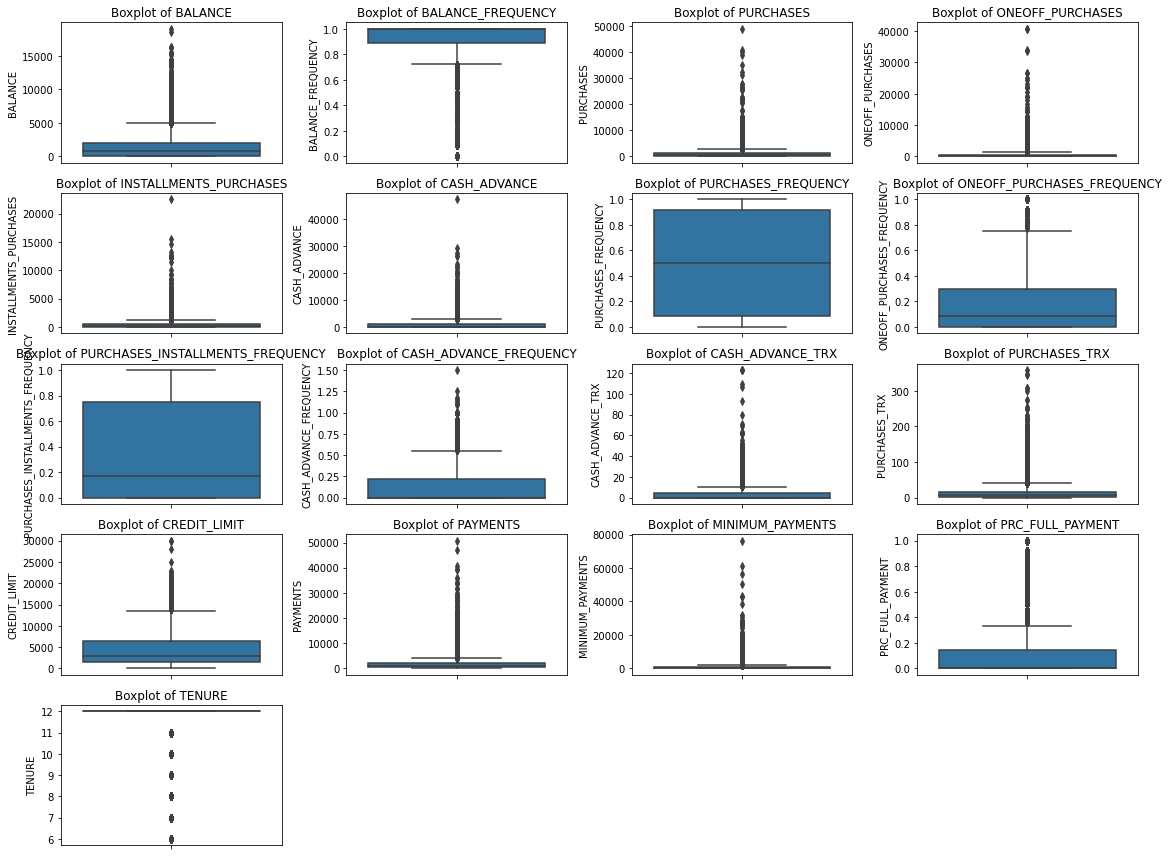

In [59]:
plt.figure(figsize=(16, 12))
Features = df.columns
for i in range(len(Features)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=df[Features[i]], data=df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [60]:
# find outlier in all columns
for i in df.select_dtypes(include=['float64', 'int64']).columns:
  max_thresold = df[i].quantile(0.95)
  min_thresold = df[i].quantile(0.05)
  creditcard_df_no_outlier = df[(
      df[i] < max_thresold) & (df[i] > min_thresold)].shape
  print(" outlier in ", i, "is", int(
      ((df.shape[0]-creditcard_df_no_outlier[0])/df.shape[0])*100), "%")


 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %


# Handling Outliers
### This can be done with two methods
### 1. Dividing df in to range of values
### 2. Getting only 0.25 to 0.75 df from normal distibution

## In this case <b>1st</b> method is suitable because we too many outliers and 2nd method drops all the outliers columns
  

In [61]:
columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
           'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:

    Range = c+'_RANGE'
    df[Range] = 0
    df.loc[((df[c] > 0) & (df[c] <= 500)), Range] = 1
    df.loc[((df[c] > 500) & (df[c] <= 1000)), Range] = 2
    df.loc[((df[c] > 1000) & (df[c] <= 3000)), Range] = 3
    df.loc[((df[c] > 3000) & (df[c] <= 5000)), Range] = 4
    df.loc[((df[c] > 5000) & (df[c] <= 10000)), Range] = 5
    df.loc[((df[c] > 10000)), Range] = 6


In [62]:
columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
           'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:

    Range = c+'_RANGE'
    df[Range] = 0
    df.loc[((df[c] > 0) & (df[c] <= 0.1)), Range] = 1
    df.loc[((df[c] > 0.1) & (df[c] <= 0.2)), Range] = 2
    df.loc[((df[c] > 0.2) & (df[c] <= 0.3)), Range] = 3
    df.loc[((df[c] > 0.3) & (df[c] <= 0.4)), Range] = 4
    df.loc[((df[c] > 0.4) & (df[c] <= 0.5)), Range] = 5
    df.loc[((df[c] > 0.5) & (df[c] <= 0.6)), Range] = 6
    df.loc[((df[c] > 0.6) & (df[c] <= 0.7)), Range] = 7
    df.loc[((df[c] > 0.7) & (df[c] <= 0.8)), Range] = 8
    df.loc[((df[c] > 0.8) & (df[c] <= 0.9)), Range] = 9
    df.loc[((df[c] > 0.9) & (df[c] <= 1.0)), Range] = 10


In [64]:
df.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
           'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
           'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
           'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
           'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
           'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'], axis=1, inplace=True)

X = np.asarray(df)


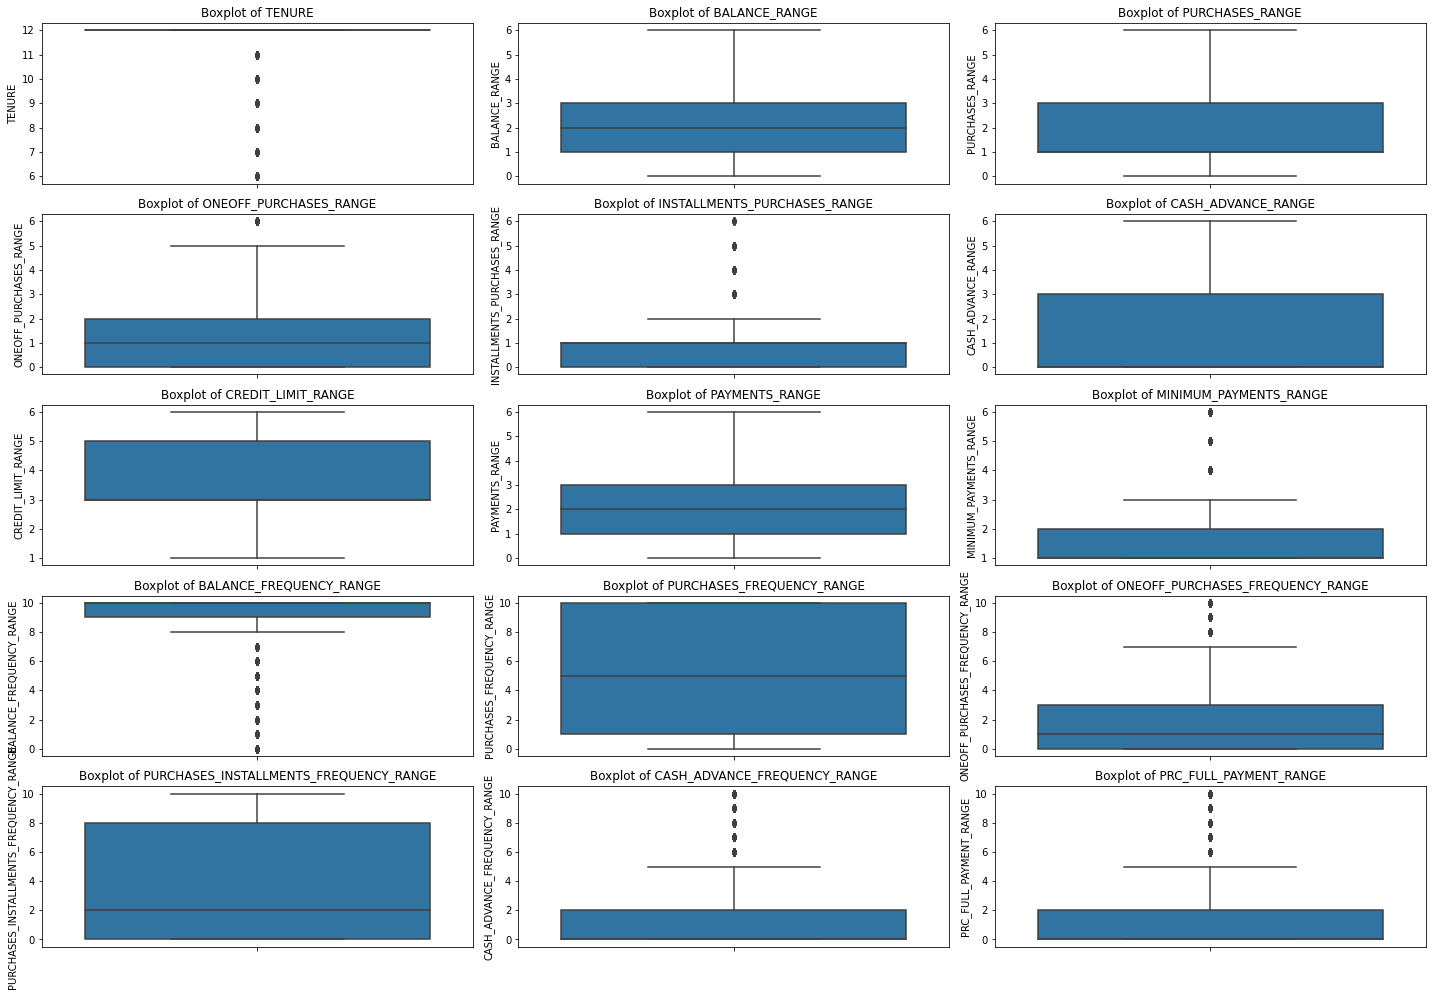

In [67]:
plt.figure(figsize=(20, 16))
Features = df.columns
for i in range(len(Features)):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=df[Features[i]], data=df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()


<AxesSubplot:>

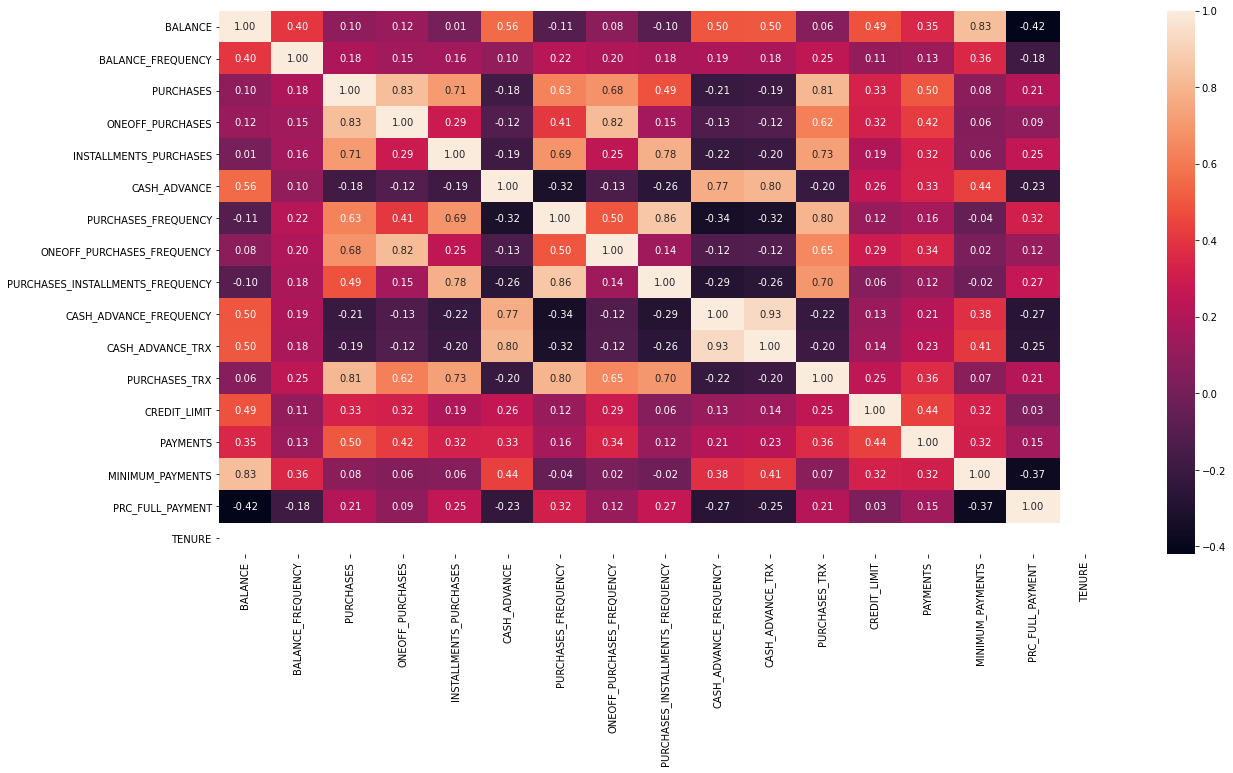

In [69]:
# correlation matrix of dfFrame
plt.figure(figsize=(20, 10))
corn = no_outlier_df.corr()
sns.heatmap(corn, annot=True, fmt='.2f')


# Clustring

In [71]:
scale = StandardScaler()
X = scale.fit_transform(no_outlier_df)
X.shape


(8949, 17)

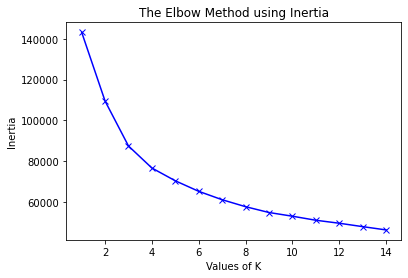

In [85]:
# find 'k' value by Elbow Method
inertia = []
range_val = range(1, 15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(X))
  inertia.append(kmean.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [86]:
kmean = KMeans(6)
kmean.fit(X)
labels = kmean.labels_


In [75]:
clusters = pd.concat([df, pd.DataFrame({'cluster': labels})], axis=1)
clusters.head()


,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,cluster
0,12.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,9.0,2.0,0.0,1.0,0.0,0.0,1.0
1,12.0,4.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,10.0,0.0,0.0,0.0,3.0,3.0,5.0
2,12.0,3.0,2.0,2.0,0.0,0.0,5.0,2.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
3,12.0,3.0,3.0,3.0,0.0,1.0,5.0,0.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0
4,12.0,2.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,3.0


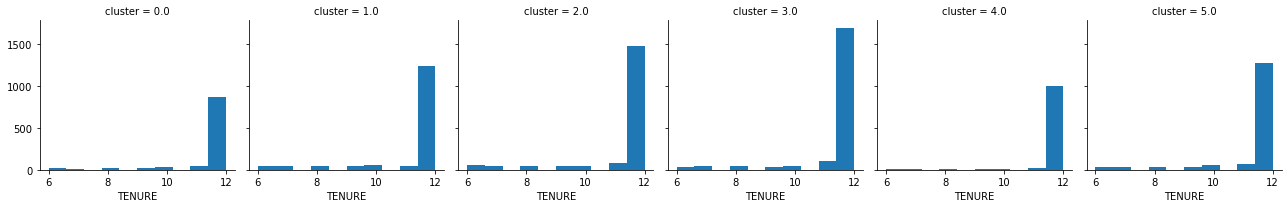

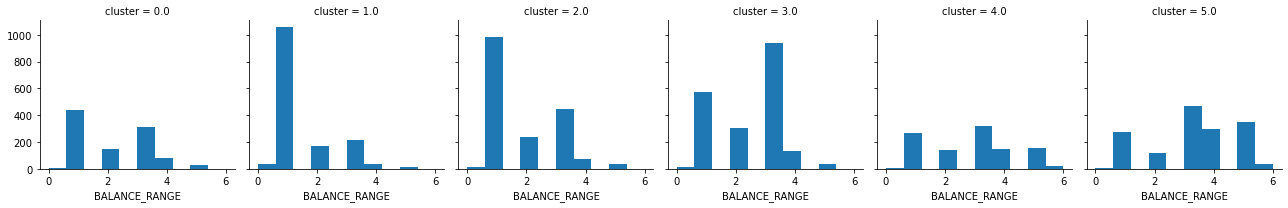

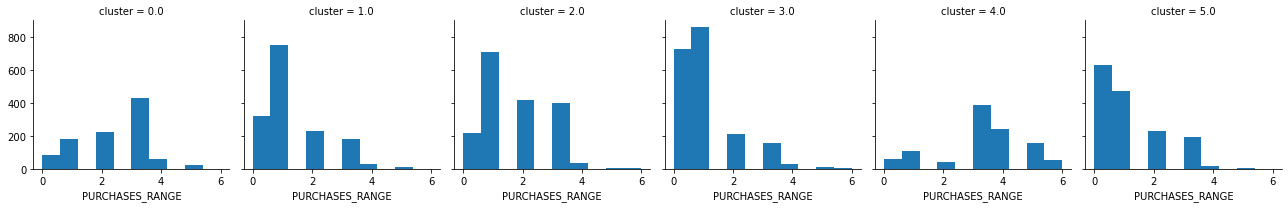

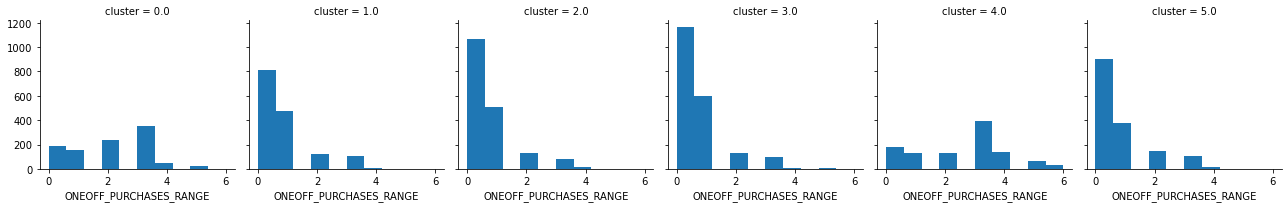

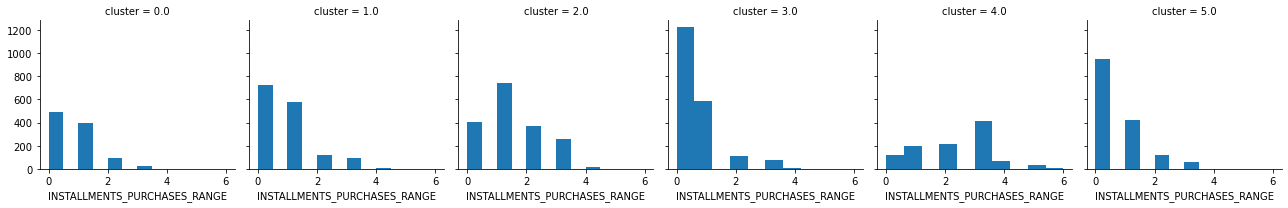

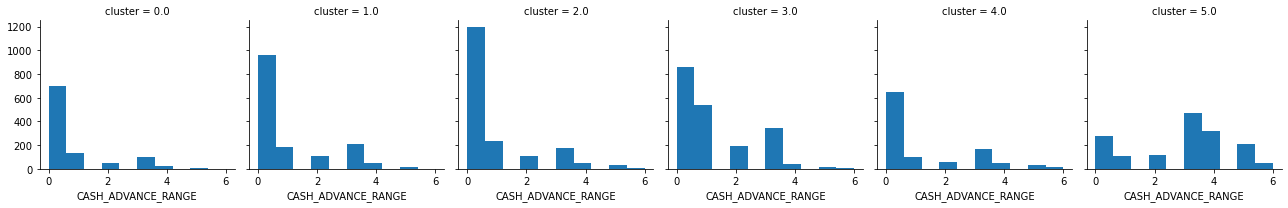

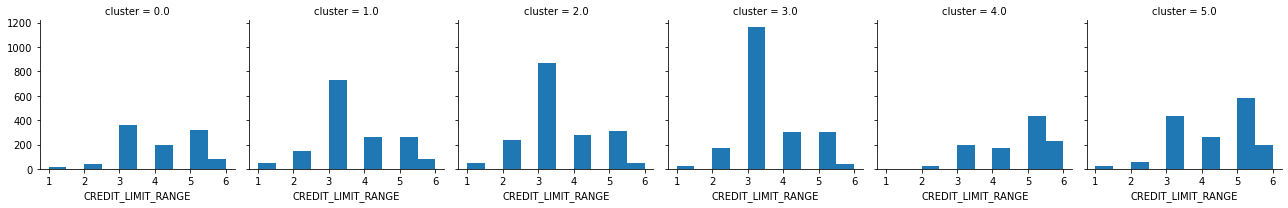

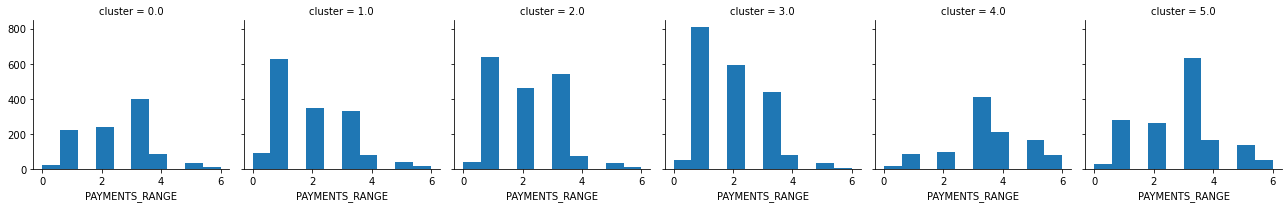

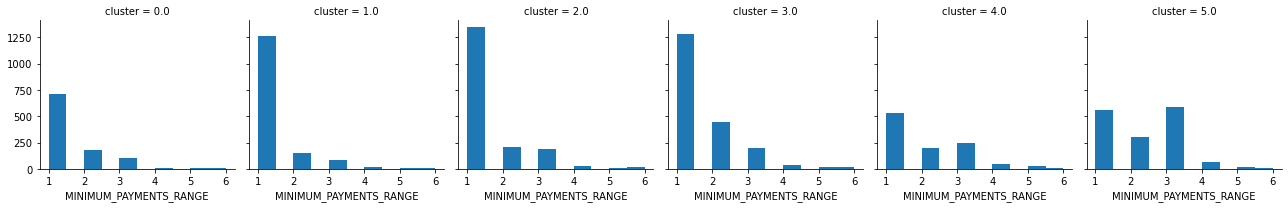

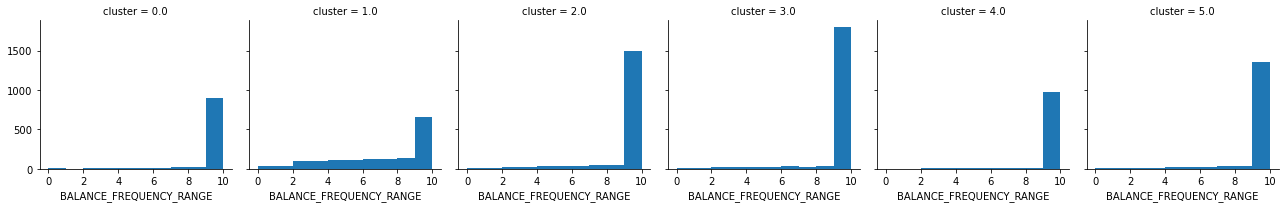

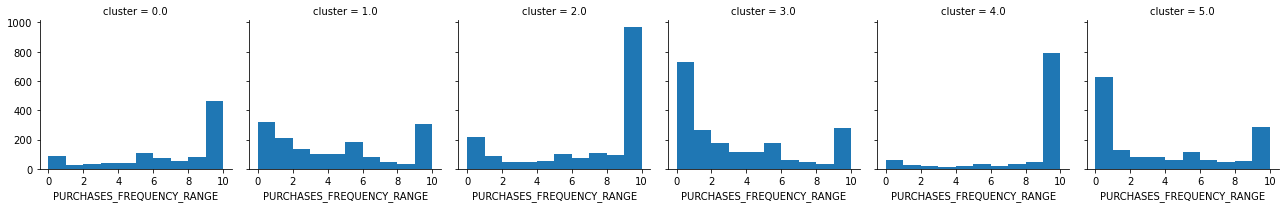

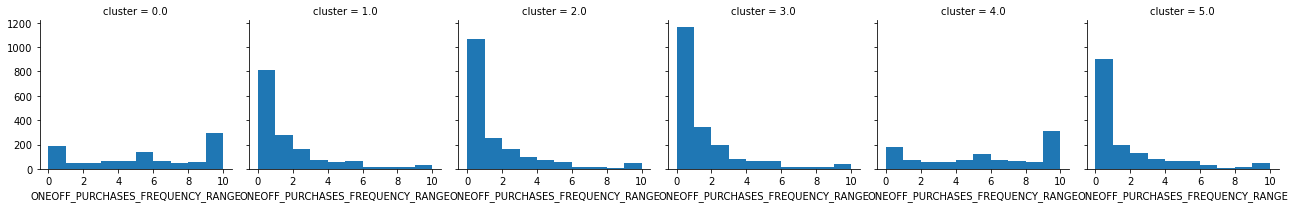

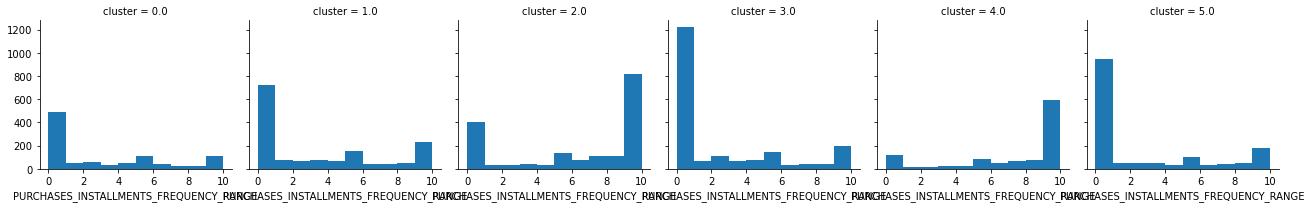

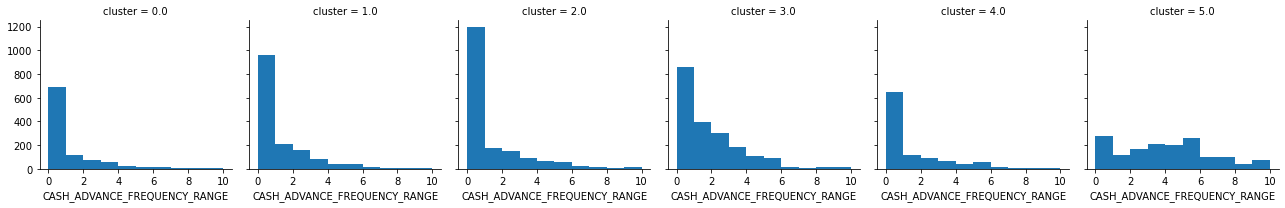

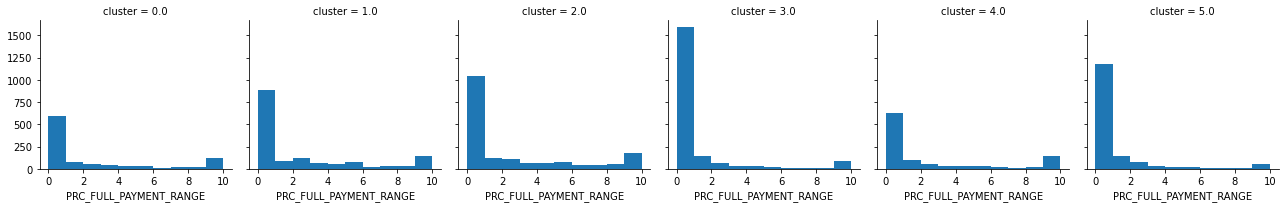

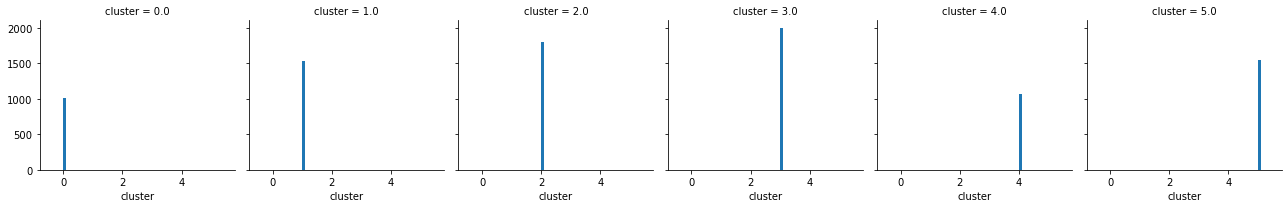

In [76]:
for c in clusters:
    grid = sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)


* Cluster0 People with average to high credit limit who make all type of purchases

* Cluster1 This group has more people with due payments who take advance cash more often

* Cluster2 Less money spenders with average to high credit limits who purchases mostly in installments

* Cluster3 People with high credit limit who take more cash in advance

* Cluster4 High spenders with high credit limit who make expensive purchases

* Cluster5 People who don't spend much money and who have average to high credit limit



# Visualization of Clusters

### Using PCA to transform data to 2 dimensions for visualization


In [79]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape


(8949, 2)

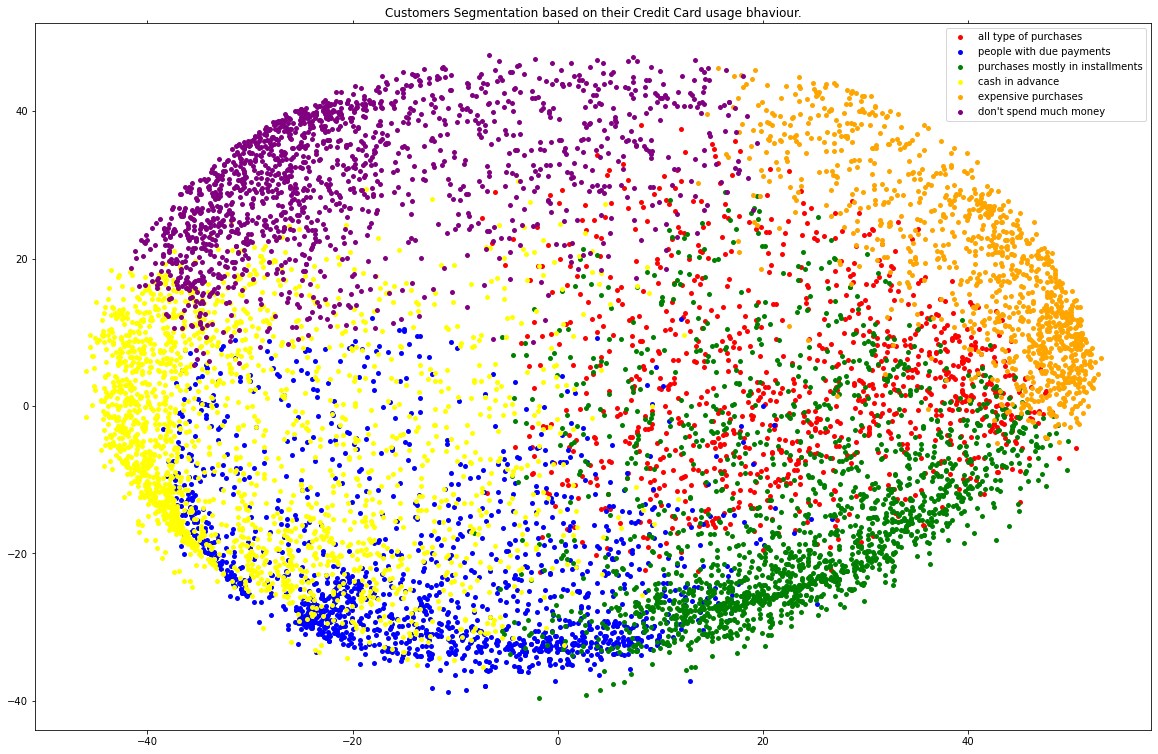

In [81]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'yellow',
          4: 'orange',
          5: 'purple'}

names = {0: 'all type of purchases',
         1: 'people with due payments',
         2: 'purchases mostly in installments',
         3: 'cash in advance',
         4: 'expensive purchases',
         5: 'don\'t spend much money'}

df = pd.DataFrame({'x': x, 'y': y, 'label': labels})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off',
                   top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off',
                   top='off', labelleft='off')

ax.legend()
ax.set_title(
    "Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()
